# Cluster 

### Methods

Try clustering the region into 16 as presented by Landschutzer et al. to apply these clusters for

https://scikit-learn.org/stable/modules/clustering.html

- SOM
- K-mean
- Ward Hierarchical Clustering

### Notes

### Resources

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
chl = xr.open_dataset('member_001/Chl_2D_mon_CESM001_1x1_198201-201701.nc')

mld = xr.open_dataset('member_001/MLD_2D_mon_CESM001_1x1_198201-201701.nc')

sss = xr.open_dataset('member_001/SSS_2D_mon_CESM001_1x1_198201-201701.nc')

sst = xr.open_dataset('member_001/SST_2D_mon_CESM001_1x1_198201-201701.nc')

u10 = xr.open_dataset('member_001/U10_2D_mon_CESM001_1x1_198201-201701.nc')

fg_co2= xr.open_dataset('member_001/FG-CO2_2D_mon_CESM001_1x1_198201-201701.nc')

xco2 = xr.open_dataset('member_001/XCO2_1D_mon_CESM001_native_198201-201701.nc')

icefrac = xr.open_dataset('member_001/iceFrac_2D_mon_CESM001_1x1_198201-201701.nc')

patm = xr.open_dataset('member_001/pATM_2D_mon_CESM001_1x1_198201-201701.nc')

pco2 = xr.open_dataset('member_001/pCO2_2D_mon_CESM001_1x1_198201-201701.nc')

In [105]:
first_chl=chl.Chl.data[0].flatten()
first_mld=mld.MLD.data[0].flatten()
first_sss=sss.SSS.data[0].flatten()
first_sst=sst.SST.data[0].flatten()
first_u10=u10.U10.data[0].flatten()
first_fg_co2=fg_co2.FG_CO2.data[0].flatten()
first_icefrac=icefrac.iceFrac.data[1].flatten()
first_patm=patm.pATM.data[0].flatten()
first_pco2=pco2.pCO2.data[0].flatten()

In [106]:
lat=chl.Chl.coords["ylat"].data
lon=chl.Chl.coords["xlon"].data

first_lat,first_lon=[],[]

for i in lon:
    for j in lat:
        first_lon.append(i)
        first_lat.append(j)
    
first_lon=np.array(first_lon)
first_lat=np.array(first_lat)

In [107]:
df_from_arr = pd.DataFrame(data=[first_chl,first_mld,first_sss,first_sst,first_u10,first_fg_co2,first_icefrac,first_patm,first_pco2,first_lon,first_lat]).T
df_from_arr.columns=['chl','mld','sss','sst','u10','fg_co2','icefrac','patm','pco2','xlon','ylat']
df_from_arr.dropna(subset = ["pco2"], inplace=True)

In [108]:
lon=df_from_arr["xlon"]
lat=df_from_arr["ylat"]


df_from_arr=df_from_arr.drop(columns=['xlon','ylat'], axis=1)

df_from_arr

,chl,mld,sss,sst,u10,fg_co2,icefrac,patm,pco2
4499,0.923969,16.192860,34.000992,1.648732,4.581627,0.017846,0.000260,0.970023,151.525853
4500,0.968525,15.115437,33.941429,1.528921,4.563333,0.017688,0.000313,0.969853,150.330599
4501,1.024705,14.071844,33.863464,1.350243,4.509812,0.017550,0.000501,0.969723,148.500409
4502,1.095643,13.072312,33.775764,1.119088,4.452416,0.017466,0.001354,0.969632,146.198458
4503,1.176906,12.333377,33.691376,0.865820,4.408782,0.017335,0.004537,0.969570,143.769723
...,...,...,...,...,...,...,...,...,...
64795,0.011132,78.797462,33.231415,-1.800895,5.157303,0.000017,0.995334,1.004274,318.496280
64796,0.011133,78.787506,33.230843,-1.800885,5.158343,0.000016,0.995311,1.004268,318.498964
64797,0.011134,78.777458,33.230263,-1.800875,5.159322,0.000016,0.995288,1.004262,318.501606
64798,0.011134,78.767319,33.229683,-1.800865,5.160829,0.000016,0.995265,1.004257,318.504223


In [126]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['chl','mld','sss','sst','u10','fg_co2','icefrac','patm','pco2'])
    ], remainder='passthrough')

scaled=ct.fit_transform(df_from_arr)

In [127]:
kmeans = KMeans(n_clusters=16, random_state=42).fit(scaled)
labels = kmeans.labels_


In [128]:
labels

array([ 2,  6,  6, ..., 12, 12, 12], dtype=int32)

In [129]:
df_from_arr["xlon"]=lon
df_from_arr["ylat"]=lat
df_from_arr["cluster"]=labels

In [130]:
df_from_arr

,chl,mld,sss,sst,u10,fg_co2,icefrac,patm,pco2,xlon,ylat,cluster
4499,0.923969,16.192860,34.000992,1.648732,4.581627,0.017846,0.000260,0.970023,151.525853,24.5,89.5,2
4500,0.968525,15.115437,33.941429,1.528921,4.563333,0.017688,0.000313,0.969853,150.330599,25.5,-89.5,6
4501,1.024705,14.071844,33.863464,1.350243,4.509812,0.017550,0.000501,0.969723,148.500409,25.5,-88.5,6
4502,1.095643,13.072312,33.775764,1.119088,4.452416,0.017466,0.001354,0.969632,146.198458,25.5,-87.5,6
4503,1.176906,12.333377,33.691376,0.865820,4.408782,0.017335,0.004537,0.969570,143.769723,25.5,-86.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
64795,0.011132,78.797462,33.231415,-1.800895,5.157303,0.000017,0.995334,1.004274,318.496280,359.5,85.5,12
64796,0.011133,78.787506,33.230843,-1.800885,5.158343,0.000016,0.995311,1.004268,318.498964,359.5,86.5,12
64797,0.011134,78.777458,33.230263,-1.800875,5.159322,0.000016,0.995288,1.004262,318.501606,359.5,87.5,12
64798,0.011134,78.767319,33.229683,-1.800865,5.160829,0.000016,0.995265,1.004257,318.504223,359.5,88.5,12


No handles with labels found to put in legend.


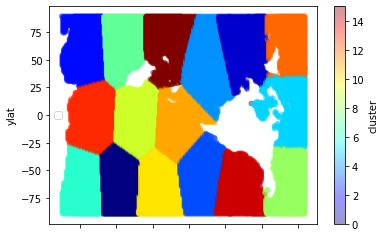

In [131]:
df_from_arr.plot(kind="scatter", x="xlon", y="ylat", alpha=0.4,c = "cluster", cmap=plt.get_cmap("jet"), colorbar=True) 
#
plt.legend()

In [137]:
centroids=kmeans.cluster_centers_


In [138]:
clusters

array([[-1.57678798e-01, -5.53986344e-01,  2.57257789e-01,
         4.05740257e-01,  3.60479629e-02, -2.23234445e-01,
        -4.56480359e-01,  6.45520709e-01,  3.21453627e-01,
         1.04812988e+02, -5.96210078e+01,  4.36763662e+00],
       [-1.89321351e-01,  1.59739591e+00,  2.65576608e-01,
        -4.35829992e-01,  1.35187813e+00,  7.88729418e-04,
        -2.52778420e-01, -5.94965881e-02,  1.94324724e-01,
         2.75278411e+02,  6.29481186e+01,  9.22767009e+00],
       [ 1.06373866e+00, -5.05637445e-01, -2.22618421e-01,
        -9.46697378e-01,  4.33577217e-01,  5.89828332e-01,
        -8.15365127e-02, -1.45791980e+00, -9.11801295e-01,
         5.95196078e+01,  5.96788786e+01,  5.17268662e+00],
       [-1.50366275e-01,  3.46912503e-01,  3.35138135e-01,
         8.62627053e-01, -2.53021364e-01,  2.66005139e-02,
        -4.56480359e-01,  3.86289524e-01, -2.21010305e-02,
         2.17461578e+02, -5.31230530e+01,  5.80737279e+00],
       [-1.30719966e-01,  4.79456695e-01,  7.5401686